# Determing Optimal Match Number for FDR Calculations (library peak max = 31)

In [1]:
import pandas as pd
import re
from matplotlib import pyplot
import csodiaq_base_functions as cbf
import csodiaq_figure_functions as cff
import csodiaq_menu_functions as menu
import os
from matplotlib.font_manager import FontProperties
pd.set_option('display.max_rows', None)

## Loading Results

In [2]:
libPeakCompareSpectral = [
    'Data/Figures/FDRGraphs/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv'
]
libPeakCompareSpectral

['Data/Figures/FDRGraphs/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv']

In [3]:
libPeakComparePeptide = [
    'Data/Figures/FDRGraphs/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv'
]
libPeakComparePeptide

['Data/Figures/FDRGraphs/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv']

In [4]:
libPeakCompareProtein = [
    'Data/Figures/FDRGraphs/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv'
]
libPeakCompareProtein

['Data/Figures/FDRGraphs/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv']

In [5]:
def make_graph_df(listOfFiles, labels):
    concatLists = []
    count = 0
    
    for i in range(len(listOfFiles)):
        temp = pd.read_csv(listOfFiles[i])
        groupName = labels[i]
        temp['group'] = [groupName for x in range(len(temp))]
        concatLists.append(temp)
    return pd.concat(concatLists)

In [6]:
libPeakCompareLabels = ['5 Library Peaks','10 Library Peaks','20 Library Peaks','31 Library Peaks']
libPeakCompareSpectralDf = make_graph_df(libPeakCompareSpectral, libPeakCompareLabels)
libPeakCompareSpectralDf.to_csv('lib_peak_compare_lib_noloss_400-2000_pt2mz_spectral.csv')
libPeakCompareSpectralDf

,matches,FDRCutoff,total,cosine,FDRDecoys,totalDecoys,group
0,4,17398,19370,0.942434,173,429,5 Library Peaks
1,5,8749,8749,0.373066,10,11,5 Library Peaks
0,4,0,30841,0.000000,0,2541,10 Library Peaks
1,5,0,16717,0.000000,0,392,10 Library Peaks
2,6,9947,9947,0.366327,57,58,10 Library Peaks
3,7,6053,6053,0.397434,7,8,10 Library Peaks
4,8,3532,3532,0.643816,0,1,10 Library Peaks
5,9,1993,1993,0.721928,-1,0,10 Library Peaks
6,10,838,838,0.864171,-1,0,10 Library Peaks
0,4,0,35191,0.000000,0,3798,20 Library Peaks


In [7]:
libPeakComparePeptideDf = make_graph_df(libPeakComparePeptide, libPeakCompareLabels)
libPeakComparePeptideDf.to_csv('lib_peak_compare_lib_noloss_400-2000_pt2mz_peptide.csv')
libPeakComparePeptideDf

,matches,FDRCutoff,total,cosine,FDRDecoys,totalDecoys,group
0,4,4369,5795,0.977569,43,283,5 Library Peaks
1,5,2767,2767,0.482540,10,11,5 Library Peaks
0,4,0,10204,0.000000,0,1508,10 Library Peaks
1,5,0,5136,0.000000,0,262,10 Library Peaks
2,6,2967,3025,0.796562,29,43,10 Library Peaks
3,7,1858,1858,0.511570,7,8,10 Library Peaks
4,8,1123,1123,0.643816,0,1,10 Library Peaks
5,9,685,685,0.831634,-1,0,10 Library Peaks
6,10,311,311,0.868731,-1,0,10 Library Peaks
0,4,0,12225,0.000000,0,2270,20 Library Peaks


In [8]:
libPeakCompareProteinDf = make_graph_df(libPeakCompareProtein, libPeakCompareLabels)
libPeakCompareProteinDf.to_csv('lib_peak_compare_lib_noloss_400-2000_pt2mz_protein.csv')
libPeakCompareProteinDf

,matches,FDRCutoff,total,cosine,FDRDecoys,totalDecoys,group
0,4,949,1951,0.993584,9,265,5 Library Peaks
1,5,933,938,0.709505,9,11,5 Library Peaks
0,4,0,4055,0.000000,0,1207,10 Library Peaks
1,5,0,1802,0.000000,0,247,10 Library Peaks
2,6,868,1010,0.936472,8,42,10 Library Peaks
3,7,655,662,0.724952,6,8,10 Library Peaks
4,8,436,436,0.643816,0,1,10 Library Peaks
5,9,303,303,0.833136,-1,0,10 Library Peaks
6,10,164,164,0.893215,-1,0,10 Library Peaks
0,4,0,4866,0.000000,0,1621,20 Library Peaks


In [9]:
fontP = FontProperties()
fontP.set_size('xx-small')

## Decreasing Peaks in Library

### Spectral Level Analysis

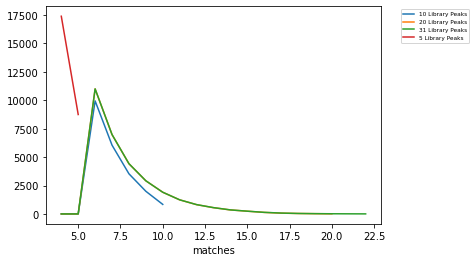

In [10]:
libPeakCompareSpectralFDR = libPeakCompareSpectralDf.pivot(index='matches', columns='group', values='FDRCutoff')
libPeakCompareSpectralFDR.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
pyplot.savefig('lib_peak_compare_lib_noloss_400-2000_pt2mz_spectral.svg',bbox_inches="tight")

### Peptide Level Analysis

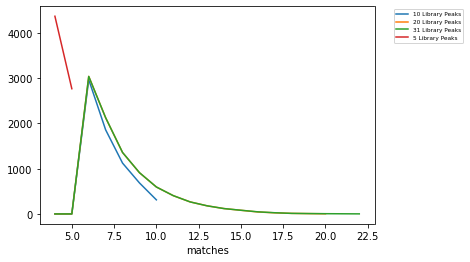

In [11]:
libPeakComparePeptideFDR = libPeakComparePeptideDf.pivot(index='matches', columns='group', values='FDRCutoff')
libPeakComparePeptideFDR.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
pyplot.savefig('lib_peak_compare_lib_noloss_400-2000_pt2mz_peptide.svg',bbox_inches="tight")

### Protein Level Analysis

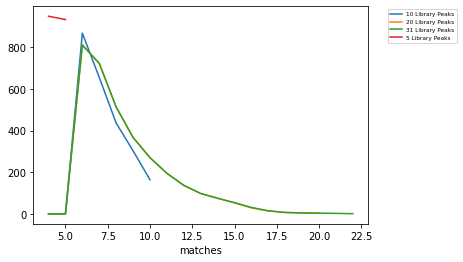

In [12]:
libPeakCompareProteinFDR = libPeakCompareProteinDf.pivot(index='matches', columns='group', values='FDRCutoff')
libPeakCompareProteinFDR.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
pyplot.savefig('lib_peak_compare_lib_noloss_400-2000_pt2mz_protein.svg',bbox_inches="tight")

## Effect of Correction and Square Root Normalization

In [14]:
correctionSpectral = [
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt_FDRGraph_spectral.csv',
#    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt_corrected_FDRGraph_spectral.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_FDRGraph_spectral.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv'
]
correctionLabels = ['no sqrt, uncorrected', 'sqrt, uncorrected', 'sqrt, corrected']
correctionSpectralDf = make_graph_df(correctionSpectral, correctionLabels)
correctionSpectralDf.to_csv('comparing_correction_strategies_lib20_noloss_400-2000_pt2mz_spectral.csv')
correctionSpectralDf

,matches,FDRCutoff,total,cosine,FDRDecoys,totalDecoys,group
0,4,0,122374,0.000000,0,35998,"no sqrt, uncorrected"
1,5,1374,50134,0.995619,13,10025,"no sqrt, uncorrected"
2,6,9549,23177,0.942346,95,2412,"no sqrt, uncorrected"
3,7,9581,12384,0.816841,95,520,"no sqrt, uncorrected"
4,8,6978,7269,0.547165,69,111,"no sqrt, uncorrected"
5,9,4521,4521,0.098240,16,17,"no sqrt, uncorrected"
6,10,2901,2901,0.117974,2,3,"no sqrt, uncorrected"
7,11,1905,1905,0.241707,-1,0,"no sqrt, uncorrected"
8,12,1226,1226,0.241707,-1,0,"no sqrt, uncorrected"
9,13,811,811,0.297152,-1,0,"no sqrt, uncorrected"


In [15]:
correctionPeptide = [
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt_FDRGraph_peptide.csv',
#    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt_corrected_FDRGraph_protein.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_FDRGraph_peptide.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv'
]
correctionPeptideDf = make_graph_df(correctionPeptide, correctionLabels)
correctionPeptideDf.to_csv('comparing_correction_strategies_lib20_noloss_400-2000_pt2mz_peptide.csv')
correctionPeptideDf

,matches,FDRCutoff,total,cosine,FDRDecoys,totalDecoys,group
0,4,0,46215,0.000000,0,17111,"no sqrt, uncorrected"
1,5,217,21001,0.998329,2,6239,"no sqrt, uncorrected"
2,6,1872,9182,0.977600,18,1743,"no sqrt, uncorrected"
3,7,2422,4427,0.921861,24,411,"no sqrt, uncorrected"
4,8,2052,2481,0.789089,20,98,"no sqrt, uncorrected"
5,9,1456,1466,0.309790,14,16,"no sqrt, uncorrected"
6,10,932,932,0.244333,2,3,"no sqrt, uncorrected"
7,11,612,612,0.309790,-1,0,"no sqrt, uncorrected"
8,12,403,403,0.241707,-1,0,"no sqrt, uncorrected"
9,13,263,263,0.335544,-1,0,"no sqrt, uncorrected"


In [16]:
correctionProtein = [
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt_FDRGraph_protein.csv',
#    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_nosqrt_corrected_FDRGraph_protein.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_FDRGraph_protein.csv',
    'Data/Figures/FDRGraphs/csodiaq_lib-human-20peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv'
]
correctionProteinDf = make_graph_df(correctionProtein, correctionLabels)
correctionProteinDf.to_csv('comparing_correction_strategies_lib20_noloss_400-2000_pt2mz_protein.csv')
correctionProteinDf

,matches,FDRCutoff,total,cosine,FDRDecoys,totalDecoys,group
0,4,0,11082,0.000000,0,5100,"no sqrt, uncorrected"
1,5,0,7506,0.000000,0,3156,"no sqrt, uncorrected"
2,6,376,3993,0.992414,3,1312,"no sqrt, uncorrected"
3,7,643,1875,0.961983,6,376,"no sqrt, uncorrected"
4,8,597,985,0.921951,5,95,"no sqrt, uncorrected"
5,9,556,596,0.591245,5,16,"no sqrt, uncorrected"
6,10,416,416,0.303948,2,3,"no sqrt, uncorrected"
7,11,286,286,0.309790,-1,0,"no sqrt, uncorrected"
8,12,203,203,0.309790,-1,0,"no sqrt, uncorrected"
9,13,134,134,0.431932,-1,0,"no sqrt, uncorrected"


### Spectral Level Analysis

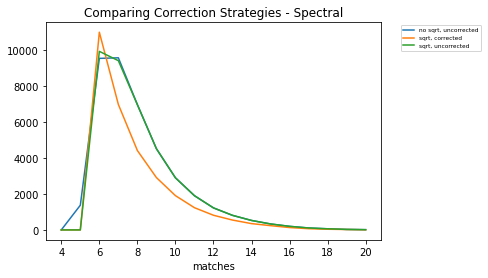

In [17]:
correctionSpectralFDR = correctionSpectralDf.pivot(index='matches', columns='group', values='FDRCutoff')
correctionSpectralFDR.plot()
pyplot.title('Comparing Correction Strategies - Spectral')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
pyplot.savefig("comparing_correction_strategies_lib20_noloss_400-2000_pt2mz_spectral.svg", bbox_inches="tight")

### Peptide Level Analysis

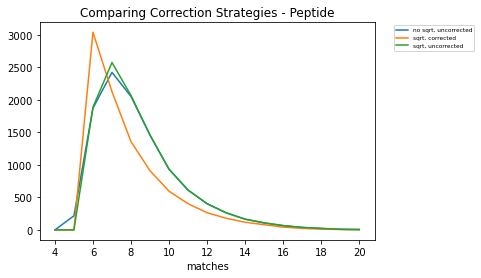

In [18]:
correctionPeptideFDR = correctionPeptideDf.pivot(index='matches', columns='group', values='FDRCutoff')
correctionPeptideFDR.plot()
pyplot.title('Comparing Correction Strategies - Peptide')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
pyplot.savefig("comparing_correction_strategies_lib20_noloss_400-2000_pt2mz_pepetide.svg", bbox_inches="tight")

### Protein Level Analysis

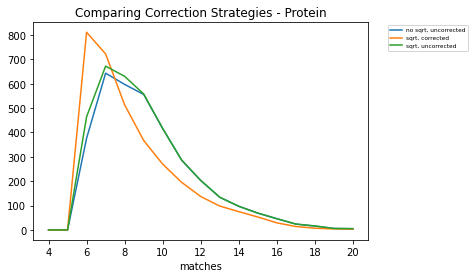

In [19]:
correctionProteinFDR = correctionProteinDf.pivot(index='matches', columns='group', values='FDRCutoff')
correctionProteinFDR.plot()
pyplot.title('Comparing Correction Strategies - Protein')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
pyplot.savefig("comparing_correction_strategies_lib20_noloss_400-2000_pt2mz_protein.svg", bbox_inches="tight")